<a href="https://colab.research.google.com/github/vaa239/Skoltech/blob/master/zabyiky_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import pandas as pd
import re
import gspread
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())


In [ ]:

worksheet = gc.open('Ответы на анкету при вступлении За буйки').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
zabyiky_df = pd.DataFrame(rows)

# Чистка данных
## анонимизируем

In [ ]:
zabyiky_df_anonim = zabyiky_df.drop(zabyiky_df.columns[[1, 3, 5, 15, 16]], axis=1)

In [ ]:
new_header = zabyiky_df_anonim.iloc[0] #grab the first row for the header
zabyiky_df_anonim = zabyiky_df_anonim[1:] #take the data less the header row
zabyiky_df_anonim.columns = new_header #set the header row as the df header

## фильтруем на тех, про кого не изестно, что они ушли

In [ ]:
zabyiky_df_anonim['Сейчас в клубе?'].unique()

array(['', 'да', 'нет', 'нет '], dtype=object)

In [ ]:
zabyiky_df_anonim['Статуст вступления: вступила или нет'].unique()

array(['', 'не оветила', 'да', 'нет'], dtype=object)

In [ ]:
zabyiky_df_anonim_clear = zabyiky_df_anonim[
 (~zabyiky_df_anonim['Статуст вступления: вступила или нет'].isin(['не оветила', 'нет'])) & 
 (~zabyiky_df_anonim['Сейчас в клубе?'].isin(['нет', 'нет ']))

 ]

In [ ]:
zabyiky_df_anonim_clear.shape, zabyiky_df.shape

((310, 16), (389, 21))

In [ ]:
zabyiky_df_anonim_clear.reset_index(drop=True, inplace=True)

# Анализируем фичи
## Города

In [ ]:
mocsw_arr = [
             'Москва',
             'Москва/МО',
             'Москве',
             'Москва, Россия',
            'Москва ',
            'Москва, РФ',
            'РФ Москва',
            'Москва. А также Сочи, Сибирь, Алтай :)',
            'Красногорск/Москва',
            'Москва, но на время удаленки СПБ',
            'В Москве',
            'Россия,Москва',
            'Россия Москва',
            'Москва/Россия',
            'Москва/Россия ',
            'Москва/ НЙ',
            'г.Москва',
            'Петербург. Но скоро будет Москва!',
            'Сейчас в Осло, но в апреле возвращаюсь в Москву',
            'Сейчас в Сочи, но вообще в Москве, вернусь в мае',
            'москва, россия',
            'Moscow',
 'В лобне',
 'Домодедово ',
 'Клин, Московская область ',
 'Королев МО',
 'МО, Лесной городок',
 'Московская область ',
 'Мск',
 'Одинцово',
 ]

In [ ]:
spb_arr = [
           'Санкт-Петербург',
 'Живу на 2 города: Париж/Петербург',
 'Санкт-Петербург ',
 'Санкт-петербург',
 'санкт-петербург',
 'Санкт-Петербург, Россия',
 'Россия, Санкт-Петербург',
 'Петербург. Но скоро будет Москва!',
 'Петербург',
 'Питер/Минск',
 ]

In [ ]:
cities_arr = zabyiky_df_anonim_clear['В каком городе/стране ты сейчас живешь'].unique()

In [ ]:
set(cities_arr) - set(spb_arr) - set(mocsw_arr)

{'Cтавангер/Норвегия',
 'London ',
 'USA, Florida',
 'Utrecht, Netherlands ',
 'Адлер/Сочи',
 'Барселона',
 'Берлин',
 'Екатеринбург',
 'Екатеринбург, Россия',
 'Израиль',
 'Кальяри (Остров Сардиния, Италия)',
 'Карелия Сортавала',
 'Красная Поляна ',
 'Лимасол/Кипр',
 'Лос Анджелес',
 'Нижний Новгород',
 'Нью-Йорк ',
 'Париж',
 'Петрозаводск',
 'Россия',
 'Самара',
 'Со ква',
 'Тель-Авив, Израиль',
 'Флоренция '}

In [ ]:
def city_clust(city: str) -> str:
  if city in mocsw_arr:
    return 'Moscow'
  if city in spb_arr:
    return 'Spb'
  return 'Other'

In [ ]:
zabyiky_df_anonim_clear['region'] = zabyiky_df_anonim_clear['В каком городе/стране ты сейчас живешь'].apply(city_clust)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
zabyiky_df_anonim_clear.region.value_counts()

Moscow    253
Spb        30
Other      27
Name: region, dtype: int64

In [ ]:
zabyiky_df_anonim_clear.region.value_counts(normalize=True)

Moscow    0.816129
Spb       0.096774
Other     0.087097
Name: region, dtype: float64

## Возраст

In [ ]:
zabyiky_df_anonim_clear['age_int'] = zabyiky_df_anonim_clear['Сколько тебе лет?'].apply(
    lambda age_str: int(re.findall(r'\d+', age_str)[0]),
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


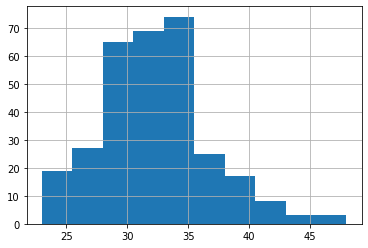

In [ ]:
zabyiky_df_anonim_clear['age_int'].hist()

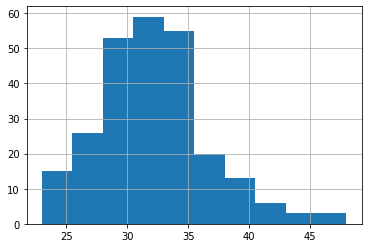

In [ ]:
zabyiky_df_anonim_clear[zabyiky_df_anonim_clear['region'] == 'Moscow']['age_int'].hist()

## Что ты ожидаешь от участия в клубе?

In [ ]:
expectations_list = [
                     'Хочу больше общения',
                     'Хочу больше читать книг/смотреть фильмов',
                     'Хочу с помощью клуба найти новое увлечение',
                     'Заявить о себе/своем проекте',
                     'Нетворкинг',
                     'Хочу больше путешествовать',
                     'Хочу получить дозу мотивации на запуск нового проекта',
]

In [ ]:
def exp_to_list(exp_str: str, default_list: list) -> list:
  exp_list = exp_str.split(', ')
  canonic_exp = [exp for exp in exp_list if exp in default_list]
  custom_exp_list = [exp for exp in exp_list if exp not in default_list]
  custom_exp = ', '.join(custom_exp_list)
  res_list = canonic_exp + [custom_exp]

  return res_list

In [ ]:
zabyiky_df_anonim_clear.head(10)['Что ты ожидаешь от участия в клубе?'].values[0].split(', ')

['Хочу больше общения',
 'Хочу с помощью клуба найти новое увлечение',
 'Хочу получить дозу мотивации на запуск нового проекта']

In [ ]:
zabyiky_df_anonim_clear.head(10)['Что ты ожидаешь от участия в клубе?'].apply(
    lambda exp_str: exp_to_list(exp_str, default_list=expectations_list)
    ).apply(pd.Series)

,0,1,2,3,4
0,Хочу больше общения,Хочу с помощью клуба найти новое увлечение,Хочу получить дозу мотивации на запуск нового ...,,NaN
1,Хочу больше общения,Нетворкинг,помогать своими компетенциями и спрашивать сов...,NaN,NaN
2,Хочу больше читать книг/смотреть фильмов,Хочу с помощью клуба найти новое увлечение,Нетворкинг,Хочу получить дозу мотивации на запуск нового ...,
3,Хочу больше общения,Хочу с помощью клуба найти новое увлечение,Хочу получить дозу мотивации на запуск нового ...,,NaN
4,Хочу больше общения,Хочу больше читать книг/смотреть фильмов,Нетворкинг,Хочу получить дозу мотивации на запуск нового ...,
5,Хочу больше общения,Хочу больше читать книг/смотреть фильмов,Нетворкинг,хочу заряжаться от общения с классными людьми ...,NaN
6,Хочу больше общения,Хочу больше читать книг/смотреть фильмов,Хочу с помощью клуба найти новое увлечение,,NaN
7,Хочу больше общения,Хочу с помощью клуба найти новое увлечение,Нетворкинг,,NaN
8,Хочу больше общения,Хочу с помощью клуба найти новое увлечение,,NaN,NaN
9,Хочу больше общения,Нетворкинг,Хочу получить дозу мотивации на запуск нового ...,,NaN


In [ ]:
exp_long_all = pd.get_dummies(zabyiky_df_anonim_clear['Что ты ожидаешь от участия в клубе?'].apply(
    lambda exp_str: exp_to_list(exp_str, default_list=expectations_list)
    ).apply(pd.Series).stack())

In [ ]:
exp_sum_df = exp_long_all.reset_index().groupby('level_0').sum()

In [ ]:
exp_sum_df.shape

(310, 60)

In [ ]:
not_expected = set(exp_sum_df.columns) - set(expectations_list) - set(['level_1', ''])

In [ ]:
for ind, exp in enumerate(not_expected):
  print(ind+1, exp)

1 Хочу развеять миф, что в 30 не находят новых друзей)
2 идеи для развития в новых сферах и позитивное общение, мотивирующее на движение
3 Второй раз в жизни наблюдаю ситуацию, когда старый круг общения редеет или разбегается. Появился запрос оживить своё окружение и добавить новых знакомств.
4 Хочу получить дозу мотивации для возвращения в активный мир из глубокого декрета головного мозга
5 Хочу расширить горизонты
6 хочу найти компанию для моих текущих увлечений
7 Хочу найти друзей 
8 хочу научиться выражать себя через качественный контент
9 Хочу жить интересной жизнью!
10 Хочу общения! Я работаю онлайн и у меня почти ноль связей с реальными людьми в оффлайне. Хочу найти друзей (тьфу, Чебурашка).
11 хочу больше движения и расширения границ своего мира
12 Поняла, что сейчас меня окружают или мои дети, или коллеги. А хочется общения и воодушевления
13 И просто найти единомышленников, интересных людей, поддержку
14 все не знала, что же у меня никак не складывается с постоянными увлечени

In [ ]:
exp_sum_df

,level_1,,"Быть внутри женского сообщества, получать добрую энергию",Быть полезной другим,"Быть с теми, с кем совпадают увлечения и принципы","В декрете я несколько «застоялась» - не хватает движухи, больше возможностей пообщаться с интересными, хорошими, красивыми людьми. Знаю, что в Забуйках все это есть)","Возможно, раскрыть какой-то талант))","Второй раз в жизни наблюдаю ситуацию, когда старый круг общения редеет или разбегается. Появился запрос оживить своё окружение и добавить новых знакомств.",Заявить о себе/своем проекте,"И просто найти единомышленников, интересных людей, поддержку","Иллюстратор(да и автор) - очень изолированная работа, так что очень хочется больше ""выходов в свет"", больше людей прекрасных и разных. Я очень люблю людей)","Мне нравится вайб клуба, о котором пишет Маша, мне нравится идея женского коммьюнити (у меня все подруги между собой не знакомы), и у меня в голове куча идей на создание новых штуковин-я верю, что я смогу начерпать столько вдохновения, сколько необходимо для запуска:)","На самом деле мне прстохояетс погрузиться, особенно в предвверии лета, в классную атмосферу замечательных, интересных, жизнерадостных людей. Возможно и получить мотивацию. Не знаю на сколько мне это надо)) но очень хочу попробовать",Найти компанию для совместных активностей,"Найти себя, друзей, насыщенную, наполненную и интересную жизнь!",Нетворкинг,"Новый круг знакомых, интересное общение","Поняла, что сейчас меня окружают или мои дети, или коллеги. А хочется общения и воодушевления",Прекрасное общение с единомышленниками,Своих людей! ),Узнавать людей и мероприятия города.,Хор ) психология под винчик,Хорошо провести время,Хочется быть в окружении людей с похожими интересами,Хочется общения в женским коммьюнити,Хочу больше общения,Хочу больше путешествовать,Хочу больше читать книг/смотреть фильмов,"Хочу быть в окружении единомышленников. Ценности клуба перекликаются с моими и я уверена, что встречу людей, скоторыми будет интересно развиваться и просто отдыхать!","Хочу добрать московской жизни, которой ужасно не хватает в эмиграции",Хочу жить интересной жизнью!,Хочу найти друзей,Хочу найти друзей. Место вне бизнеса и рабочего нетворкинга,"Хочу общения! Я работаю онлайн и у меня почти ноль связей с реальными людьми в оффлайне. Хочу найти друзей (тьфу, Чебурашка).",Хочу познакомиться с умными и разными женщинами для вдохновения и общения,Хочу получить дозу мотивации для возвращения в активный мир из глубокого декрета головного мозга,Хочу получить дозу мотивации на запуск нового проекта,"Хочу посещать активные мероприятия и слушать вебинары на разные темы, о которых бы я сама не задумалась","Хочу развеять миф, что в 30 не находят новых друзей)",Хочу расширить горизонты,Хочу с помощью клуба найти новое увлечение,Я все хочу 😅,"быть полезной и возможно помочь кому-то, а еще просто получать удовольствие от общения с людьми со схожими интересами",быть полезной сообществу девушек,вдохновения),"все не знала, что же у меня никак не складывается с постоянными увлечениями. И вот поняла, что ваш клуб - это идеальное увлечение для меня. Так как я люблю разнообразие. Не ходить на танцы 2 раза в неделю. А сегодня сходить на танцы с девочками, завтра в театр, потом на выставку, потом загород, потом на психологию под винчик) Это идеальный план, для меня))","душевных посиделок, физической активности (идея с футболом топчик!), узнать что то новое или попробовать новое","идеи для развития в новых сферах и позитивное общение, мотивирующее на движение",найти единомышленников,партнерство DTMS и Забуйки,помогать своими компетенциями и спрашивать совета других,"разнообразный досуг, качественное общение",стадия смены старой работы поиск новой и себя,хочу больше движения и расширения границ своего мира,"хочу быть в контакте с крутыми мотивирующими людьми, с кем хочется быть на одной волне. И которым я тоже могу быть интересна и полезна. В идеале - хочу ""своих"". Думаю, ""За буйки"" - отличный способ быть в теме, двигаться и быть в классной тусов

In [ ]:
zabyiky_df_anonim_clear_exp = zabyiky_df_anonim_clear.join(exp_sum_df[expectations_list], how='left')

In [ ]:
zabyiky_df_anonim_clear_exp.groupby(
    ['region']
    )[expectations_list].sum()

,Хочу больше общения,Хочу больше читать книг/смотреть фильмов,Хочу с помощью клуба найти новое увлечение,Заявить о себе/своем проекте,Нетворкинг,Хочу больше путешествовать,Хочу получить дозу мотивации на запуск нового проекта
region,,,,,,,
Moscow,234,135,143,51,167,20,84
Other,20,18,16,5,17,2,12
Spb,29,11,20,5,17,3,10


In [ ]:
zabyiky_df_anonim_clear_exp.groupby(
    ['region']
    )[expectations_list].sum()/zabyiky_df_anonim_clear_exp.groupby(['region']).size().values.reshape(-1,1)

,Хочу больше общения,Хочу больше читать книг/смотреть фильмов,Хочу с помощью клуба найти новое увлечение,Заявить о себе/своем проекте,Нетворкинг,Хочу больше путешествовать,Хочу получить дозу мотивации на запуск нового проекта
region,,,,,,,
Moscow,0.924901,0.533597,0.565217,0.201581,0.660079,0.079051,0.332016
Other,0.740741,0.666667,0.592593,0.185185,0.629630,0.074074,0.444444
Spb,0.966667,0.366667,0.666667,0.166667,0.566667,0.100000,0.333333


In [ ]:
(zabyiky_df_anonim_clear_exp[expectations_list].sum()/zabyiky_df_anonim_clear_exp.shape[0]).sort_values(ascending=False)

Хочу больше общения                                      0.912903
Нетворкинг                                               0.648387
Хочу с помощью клуба найти новое увлечение               0.577419
Хочу больше читать книг/смотреть фильмов                 0.529032
Хочу получить дозу мотивации на запуск нового проекта    0.341935
Заявить о себе/своем проекте                             0.196774
Хочу больше путешествовать                               0.080645
dtype: float64

## Какие из мероприятий тебе интересны?

In [ ]:
interest_list = [
                 'Поездки и путешествия',
                 'Воскресные завтраки',
                 'Книжный клуб',
                 'Киноклуб',
                 'Дискусионный клуб и дебаты',
                 'Походы по театрам, музеям',
                 'Спортивные активности (футбол, яхтинг, бег и др)',
                 'Онлайн-встречи и лекции',
                 'Времени особо нет, хочу просто быть с вами',
]

In [ ]:
old_interest_list = [
                 'Воскресные бранчи',
                 'Йога/медитация/зарядка по утрам',
                  'Винные дегустации',
             'Лекции об искусстве',
             'Клуб рисовальщиков',
]

In [ ]:
zabyiky_df_anonim.head()

,Отметка времени,Твое имя,Сколько тебе лет?,В каком городе/стране ты сейчас живешь,"Расскажи немного о себе (то, что сочтешь нужным, например, дети, работа, мечты)",Какие лекции смотришь/ подкасты слушаешь/ чем увлекаешься?,Как ты узнала о нас?,Что ты ожидаешь от участия в клубе?,"В чем ты особенно хорошо разбираешься? (в вине, путешествиях, детях, психологии, коучинге и тп)",Чему можешь научить других?,Что тебе было бы интересно реализовать в рамках клуба?,Какие из мероприятий тебе интересны?,Статуст вступления: вступила или нет,Сейчас в клубе?,Пришла ли потом на мероприятие после отказа/вступления?,"Вступила ли после открытого мероприятия, если ей отказали и отправили на открытое"
1,02.06.2020 13:56:52,Архипова Юлия,37,Москва,"Я в поиске новых интересных знакомств, знаний,...","Это профессиональные вещи (закупки), лекции по...",На встрече stayhungry Мария рассказывала про с...,"Хочу больше общения, Хочу с помощью клуба найт...","В закупках, в детях, в путешествиях, в кино.","Корзинки из джута недавно научилась вязать, мо...",Новые знакомства и новые увлечения для себя,"Книжный клуб, Киноклуб, Винные дегустации, Вос...",,,,
2,02.06.2020 23:26:17,Алия,26,Москва,Режиссер постановщик. Сейчас разрабатывает пла...,"Смотрю все , что связанно с конкретным запросо...",Подруга уже состоит в клубе и много о вас расс...,"Хочу больше общения, Нетворкинг, помогать свои...","Инвестиции, профессиональном безделии, как дел...",Могу только рассказать что-то из своего личног...,Развитие себя как преподавателя/лектора/коуча,"Киноклуб, Винные дегустации, Воскресные бранчи...",,,,
3,04.06.2020 11:18:53,Асель,34,"Utrecht, Netherlands","Учусь на голландском, в местном университете. ...","Увлекаюсь темой психологии, литературы. Слуша...","По сторис вашего гостя, Mari in Amsterdam","Хочу больше читать книг/смотреть фильмов, Хочу...","В изучении языков, путешествиях",Принимать себя и любить такой какая есть,Научится быть более открытой и доверчивой,"Времени особо нет, хочу просто быть с вами",,,,
4,04.06.2020 19:54:56,Алёна,34,Москва/МО,Сейчас нахожусь в поисках новых интересных про...,"Лекции смотрю по дизайну интерьера, фотографии...",Инстаграм клуба,"Хочу больше общения, Хочу с помощью клуба найт...","Путешествиях, строительстве и в вопросах о жив...","Вопросы строительства, юридические консультаци...","Было бы интересно начать делить тем, что я зна...","Книжный клуб, Винные дегустации, Воскресные бр...",,,,
5,05.06.2020 12:05:31,Катя,33,Москве,"Работаю в музее, изучаю театральные афиши. Хоч...","Albitious на YouTube, лекции по менеджменту ку...",Личный инстаграм Маши Тимошенко (@mashalover),"Хочу больше общения, Хочу больше читать книг/с...",Путешествиях,"6 лет преподавала обществознание, но сейчас за...",,"Йога/медитация/зарядка по утрам, Книжный клуб,...",,,,


In [ ]:
def exp_to_list(exp_str: str, default_list: list) -> list:
  canonic_exp = [exp for exp in default_list if exp in exp_str]
  for exp in canonic_exp:
    exp_str = exp_str.replace(exp, '')
  exp_list = exp_str.split(',')

  custom_exp = ', '.join([intr.strip() for intr in exp_list if intr.strip() != ''])
  res_list = canonic_exp + [custom_exp]

  return res_list

In [ ]:
intr_long_all = pd.get_dummies(zabyiky_df_anonim_clear['Какие из мероприятий тебе интересны?'].apply(lambda intr_str:
    exp_to_list(intr_str, interest_list+old_interest_list)
    ).apply(pd.Series).stack())

In [ ]:
intr_long_all

...  хорошо бы еще необычный интересный спорт. я видела, вы на сапах плаваете, а я их люблю :)
0   0  0  ...                                                  0                                        
    1  0  ...                                                  0                                        
    2  0  ...                                                  0                                        
    3  0  ...                                                  0                                        
    4  0  ...                                                  0                                        
...   ..  ...                                                ...                                        
309 3  0  ...                                                  0                                        
    4  0  ...                                                  0                                        
    5  0  ...                                                  0                                        
    6  0  ...                                                  0                                        
    7  1  ...                                                  0                                        

[2013 rows x 55 columns]

In [ ]:
int_sum_df = intr_long_all.reset_index().groupby('level_0').sum()

In [ ]:
int_sum_df['Воскресная еда'] = int_sum_df['Воскресные бранчи'] | int_sum_df['Воскресные завтраки']

In [ ]:
int_sum_df['Спорт'] = int_sum_df['Спортивные активности (футбол, яхтинг, бег и др)'] | int_sum_df['Йога/медитация/зарядка по утрам']

In [ ]:
not_expected_intr = set(int_sum_df.columns) - set(interest_list+old_interest_list) - set(['level_1', ''])

In [ ]:
for ind, intr in enumerate(not_expected_intr):
  print(ind, intr)

0 хорошо бы еще необычный интересный спорт. я видела, вы на сапах плаваете, а я их люблю :)
1 Ещё очень интересны гараж сейлы, своп девичники.
2 Но времени мало, а хочется все!
3 лекции про коммуникации, PR, продвижение
4 Коллажинг, психология, танцы
5 почти все интересно, надо попробовать
6 А также мероприятия в формате онлайн
7 Интересны все направления, просто в разной степени)
8 велопрогулки, пин-понг, гастроли по новым кафе и местам, совместные походы в магазины, помощь в организации чего-либо, загородные поездки, психология, клубы/чаты по интересам))
9 Бизнес
10 Выезды загород, танцы, пробежки, кулинарные мастер-классы, экскурсии, фото-проекты
11 Выезды в интересные места, дегустации, интересные приглашённые спикеры (по темам бизнеса, саморазвития)
12 Выезды, ретриты / телесные практики/ нетворк-мероприятия/вечеринки / свопы
13 Очень люблю пробовать новое
14 Спорт (Водный, колесный, с мячами), путешествия, совместные походы на выставки, вылазки за город, практика английского
15 в

In [ ]:
interest_cols_all = interest_list+old_interest_list+['Воскресная еда', 'Спорт']

In [ ]:
zabyiky_df_anonim_clear_intr = zabyiky_df_anonim_clear.join(int_sum_df[interest_cols_all], how='left')

In [ ]:
(zabyiky_df_anonim_clear_intr[
                              interest_cols_all
                              ].sum()/zabyiky_df_anonim_clear_intr.shape[0]).sort_values(ascending=False)

Книжный клуб                                        0.741935
Воскресная еда                                      0.735484
Киноклуб                                            0.674194
Спорт                                               0.645161
Дискусионный клуб и дебаты                          0.629032
Воскресные бранчи                                   0.590323
Лекции об искусстве                                 0.587097
Винные дегустации                                   0.545161
Йога/медитация/зарядка по утрам                     0.535484
Клуб рисовальщиков                                  0.367742
Походы по театрам, музеям                           0.154839
Времени особо нет, хочу просто быть с вами          0.148387
Воскресные завтраки                                 0.145161
Поездки и путешествия                               0.145161
Онлайн-встречи и лекции                             0.119355
Спортивные активности (футбол, яхтинг, бег и др)    0.109677
dtype: float64

In [ ]:
(zabyiky_df_anonim_clear_intr.groupby(
    ['region']
    )[interest_list].sum()/zabyiky_df_anonim_clear_intr.groupby(['region']).size().values.reshape(-1,1)).T.sort_values(
        'Spb',
        ascending=False,
        )

region,Moscow,Other,Spb
Дискусионный клуб и дебаты,0.628458,0.555556,0.700000
Книжный клуб,0.750988,0.740741,0.666667
Киноклуб,0.675889,0.703704,0.633333
Поездки и путешествия,0.150198,0.111111,0.133333
Воскресные завтраки,0.158103,0.037037,0.133333
"Походы по театрам, музеям",0.162055,0.111111,0.133333
"Спортивные активности (футбол, яхтинг, бег и др)",0.118577,0.037037,0.100000
Онлайн-встречи и лекции,0.126482,0.111111,0.066667
"Времени особо нет, хочу просто быть с вами",0.142292,0.296296,0.066667


In [ ]:
(zabyiky_df_anonim_clear_intr.groupby(
    ['region']
    )[interest_cols_all].sum()/zabyiky_df_anonim_clear_intr.groupby(['region']).size().values.reshape(-1,1)).T.sort_values(
        'Spb',
        ascending=False,
        )

region,Moscow,Other,Spb
Воскресная еда,0.782609,0.259259,0.766667
Спорт,0.652174,0.481481,0.733333
Дискусионный клуб и дебаты,0.628458,0.555556,0.700000
Книжный клуб,0.750988,0.740741,0.666667
Киноклуб,0.675889,0.703704,0.633333
Воскресные бранчи,0.624506,0.222222,0.633333
Йога/медитация/зарядка по утрам,0.533597,0.444444,0.633333
Лекции об искусстве,0.588933,0.518519,0.633333
Винные дегустации,0.561265,0.333333,0.600000
Клуб рисовальщиков,0.367589,0.444444,0.300000
